<a href="https://colab.research.google.com/github/PattarapornH/mnist/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
num_of_train_samples = X_train.shape[0]
num_of_test_samples = X_test.shape[0]
row = X_train.shape[1]
col = X_train.shape[2]

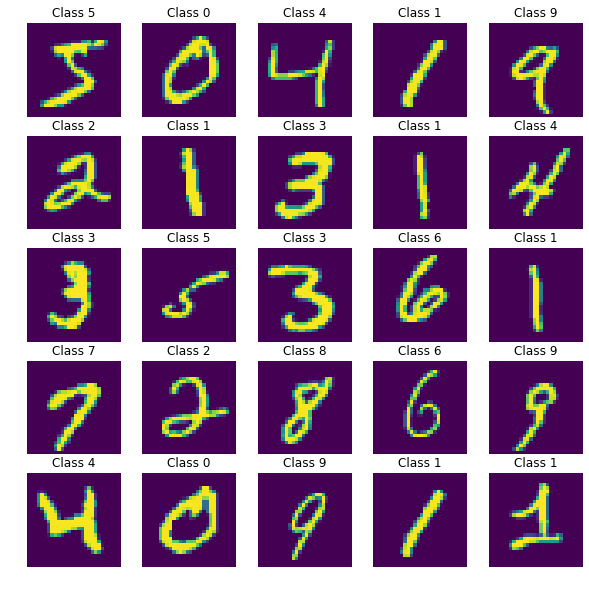

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title("Class {}".format(y_train[i]))

In [0]:
# RGB 0-255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train_re = X_train.reshape(num_of_train_samples, row*col)
X_test_re = X_test.reshape(num_of_test_samples, row*col)

In [0]:
# convert to one-hot
y_train_bin = np_utils.to_categorical(y_train, 10)
y_test_bin = np_utils.to_categorical(y_test, 10)

In [27]:
# Init NN
model = Sequential()

# Input layer
model.add(Dense(256, activation='relu', input_shape=(row*col,)))
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_model = model.fit(X_train_re,y_train_bin,batch_size=100,epochs=100,validation_data=(X_test_re,y_test_bin))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2762 - acc: 0.9177 - val_loss: 0.1147 - val_acc: 0.9636
Epoch 2/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.1176 - acc: 0.9633 - val_loss: 0.0830 - val_acc: 0.9742
Epoch 3/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0848 - acc: 0.9741 - val_loss: 0.0801 - val_acc: 0.9759
Epoch 4/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0687 - acc: 0.9788 - val_loss: 0.0782 - val_acc: 0.9747
Epoch 5/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0578 - acc: 0.9818 - val_loss: 0.0638 - val_acc: 0.9807
Epoch 6/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0476 - acc: 0.9852 - val_loss: 0.0660 - val_acc: 0.9791
Epoch 7/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0439 - acc: 0.9856 - val_loss: 0.0611 - 

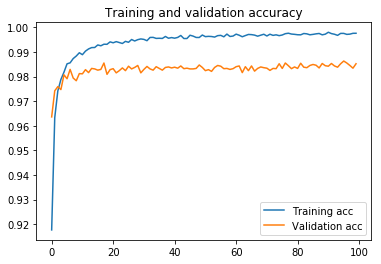

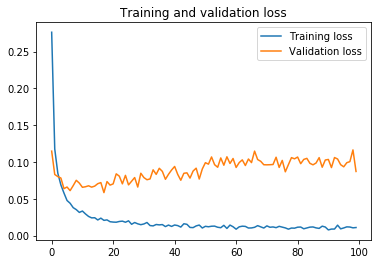

In [29]:
acc = train_model.history['acc']
val_acc = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
score = model.evaluate(X_test_re, y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08711057908386954
Test accuracy: 0.9852


In [0]:
predicted = model.predict_classes(X_test_re)

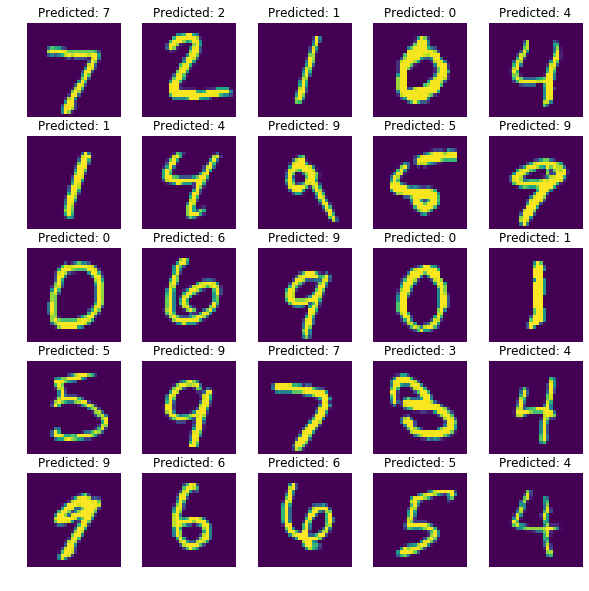

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    title = "Predicted: "+str(predicted[i])
    plt.title(title)
    plt.axis('off')
    plt.imshow(X_test[i])

In [0]:
model.save('gdrive/My Drive/Colab Notebooks/mnist/mode.h5')